In [1]:
# https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/data

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.conv_learner import *

In [21]:
PATH = 'data/planet/samples/'

In [22]:
ls {PATH}

test-jpg/  train-jpg/


In [13]:
from fastai.plots import *

In [16]:
# plots_from_files? # shift enter

In [23]:
f"{PATH}train-jpg/train_0.jpg"

'data/planet/samples/train-jpg/train_0.jpg'

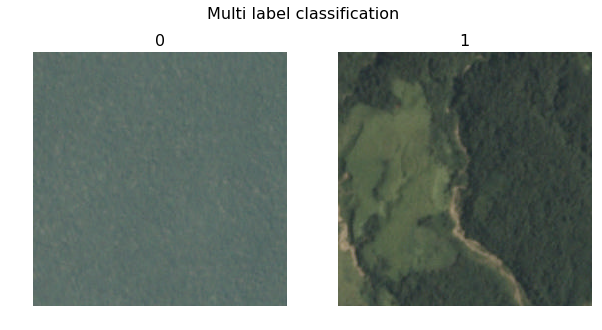

In [26]:
list_paths = [ f"{PATH}train-jpg/train_0.jpg",
    f"{PATH}train-jpg/train_1.jpg"]
titles =['0', '1']
plots_from_files(list_paths, titles=titles, maintitle="Multi label classification")

In [27]:
from planet import f2# check competition 
metrics = [f2]
f_model = resnet34

In [28]:
label_csv = f"{PATH}train_v2.csv"
n = len(list(open(label_csv))) -1
val_idxs = get_cv_idxs(n)
val_idxs[:5]

array([34602, 11243, 14499, 18918, 30631])

In [33]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv,
                tfms=tfms, suffix='.jpg', val_idxs=val_idxs, 
                test_name='test-jpg')

In [34]:
data = get_data(256)
x, y = next(iter(data.val_dl))

In [37]:
" ".join([a for a,b in zip(data.classes, y[0]) if b > 0])

'agriculture clear primary water'

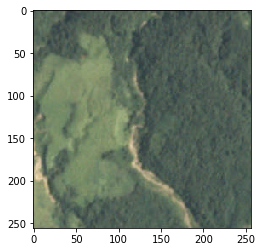

In [44]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4)

In [45]:
sz=64
data= get_data(sz)
data = data.resize(int(sz*1.3), 'tmp')


In [51]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

epoch      trn_loss   val_loss   f2                          
    0      0.216067   0.275663   0.806283  



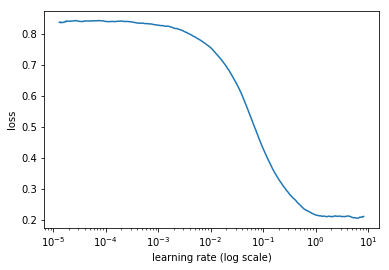

In [52]:
lrf = learn.lr_find()
learn.sched.plot()

In [53]:
lr = .2
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                          
    0      0.146458   0.133088   0.883236  
    1      0.14435    0.127761   0.889301                    
    2      0.137632   0.125498   0.891751                    
    3      0.136733   0.124802   0.891841                    
    4      0.134346   0.122504   0.894613                    
    5      0.132923   0.121772   0.894789                    
    6      0.131683   0.121343   0.895615                    



[array([0.12134]), 0.895615435297932]

In [55]:
lrs = np.array([lr/9, lr/3, lr])
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                          
    0      0.121079   0.109429   0.908904  
    1      0.117468   0.105389   0.910305                    
    2      0.111036   0.101098   0.915909                    
    3      0.111626   0.107707   0.90963                     
    4      0.105822   0.099767   0.91758                     
    5      0.101752   0.096965   0.919654                    
    6      0.096623   0.096361   0.919562                     



[array([0.09636]), 0.9195617286091176]

In [56]:
learn.save(f"{sz}")

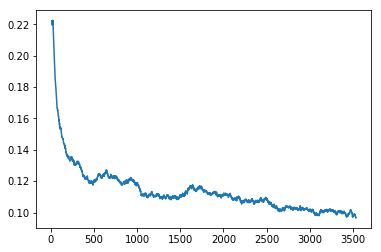

In [57]:
learn.sched.plot_loss()

In [58]:
sz=128
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                           
    0      0.098534   0.093199   0.921259  
    1      0.102511   0.092164   0.921718                     
    2      0.093873   0.092059   0.921814                     
    3      0.101786   0.091596   0.92269                      
    4      0.100167   0.091245   0.922114                     
    5      0.09382    0.090866   0.923301                     
    6      0.093249   0.090592   0.923525                     



[array([0.09059]), 0.9235248283019457]

In [59]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f"{sz}")

    1      0.092648   0.086586   0.927156                     
    2      0.089509   0.084566   0.929648                     
    3      0.091176   0.08764    0.926912                     
    4      0.087826   0.084496   0.931068                     
    5      0.085462   0.083374   0.931769                     
    6      0.08166    0.083219   0.930781                     



In [60]:
sz=256
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                           
    0      0.090492   0.087088   0.926829  
    1      0.091141   0.085731   0.928604                     
    2      0.089319   0.085552   0.929153                     
    3      0.088965   0.085791   0.927845                     
    4      0.087185   0.085058   0.928897                     
    5      0.090959   0.084643   0.929423                     
    6      0.088444   0.084908   0.928924                     



[array([0.08491]), 0.9289241663760038]

In [61]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   f2                           
    0      0.089251   0.081653   0.932481  
    1      0.08599    0.083023   0.932903                     
    2      0.080976   0.080735   0.933721                     
    3      0.085118   0.083055   0.93217                      
    4      0.084962   0.082536   0.932252                     
    5      0.080044   0.080821   0.933689                     
    6      0.0787     0.08039    0.933677                     



In [65]:
learn.load(f'{sz}')


In [66]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [67]:
f2(preds,y)

0.9319471044025315